# create figures for med4 DE long term 

In [1]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

Warning message:
"package 'DESeq2' was built under R version 4.2.2"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
"package 'BiocGenerics' was built under R version 4.2.1"

Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    exp

In [2]:
library(ggrepel)

Warning message:
"package 'ggrepel' was built under R version 4.2.1"


In [90]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [26]:
hpath_fname = file.path('..', 'genomes', 'MED4', 'MED4_protein_list.csv')
hpath_df = read.csv(hpath_fname)


In [27]:
df_all_orig = read_csv(file.path('DE_results', 'MED4_all_FC_results.csv'))



Rows: 24377 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): contrast, gene_id, Assay, contrast1
dbl (5): logFC, AveExpr, pvalue, padj, Length
lgl (2): down, up

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [28]:
df_all_orig = df_all_orig %>%
    filter(contrast1 %in% c('LATEvsC1_prot', 'LATEvsC1P1_rna'))

In [29]:
df_degenes = df_all_orig %>% 
    filter(padj < 0.05)

In [30]:
df_degenes2 = df_all_orig %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>1.5)

In [31]:
names(hpath_df); names(df_all_orig)

[1] "Name"               "gene"               "locus_tag"         
 [4] "old_locus_tag"      "source"             "start"             
 [7] "end"                "strand"             "Note"              
[10] "exception"          "inference"          "product"           
[13] "protein_id"         "gene_length"        "path_id"           
[16] "main"               "sub"                "path"              
[19] "ecpath"             "Category"           "Membrane.transport"
[22] "kegg_gene1"         "kegg_gene2"

[1] "contrast"  "gene_id"   "logFC"     "AveExpr"   "pvalue"    "padj"     
 [7] "Assay"     "contrast1" "Length"    "down"      "up"

In [59]:
df_all = left_join(df_all_orig, hpath_df, by=c('gene_id'='locus_tag'))

In [60]:
df_all %>% count(Category) %>% arrange(desc(n)) 

Category,n
<chr>,<int>
Other,804
Uncharacterized,594
Genetic Info,545
Metabolism,355
AA/Nucleotide,320
Energy/Carbohydrate/Glycan,189
Membrane transport,161
Photosynthesis/Carbon fixation,134
AA/Nucleotide;Energy/Carbohydrate/Glycan,72


In [35]:
unique(df_all$contrast1)

[1] "LATEvsC1_prot"  "LATEvsC1P1_rna"

In [36]:
t(head(df_all))

contrast,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1,Clongterm - C1
gene_id,TX50_RS01980,TX50_RS00040,TX50_RS04695,TX50_RS01970,TX50_RS05170,TX50_RS05585
logFC,3.191075,-1.443788,1.373159,3.706744,2.210139,2.786227
AveExpr,0.9167156,1.5845359,2.2254880,3.6657560,-1.3469405,-1.7260158
pvalue,6.252913e-10,1.202458e-08,1.731707e-08,2.510390e-08,2.650587e-08,3.478220e-08
padj,8.904149e-07,7.127836e-06,7.127836e-06,7.127836e-06,7.127836e-06,7.127836e-06
Assay,Proteome,Proteome,Proteome,Proteome,Proteome,Proteome
contrast1,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot,LATEvsC1_prot
Length,852,2439,912,1491,1134,954
down,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
up,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE


In [37]:
# number of differentiall expressed genes
df_all %>%
    filter(padj < 0.05) %>% count(Assay, down)

Assay,down,n
<chr>,<lgl>,<int>
Proteome,FALSE,208
Proteome,TRUE,206
RNA,FALSE,207
RNA,TRUE,178


# Top up and down regulated genes

In [38]:
df_all %>%
    filter(padj < 0.05) %>% top_n(-50, logFC) %>% 
    select(Assay,logFC,gene, product, Category) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category
<chr>,<dbl>,<chr>,<chr>,<chr>
Proteome,-3.062849,(pepE),peptidase E,Metabolism
Proteome,-3.089786,,oligoketide cyclase,Other
Proteome,-2.437843,,GAF domain-containing protein,Other
Proteome,-1.956601,,hypothetical protein,Uncharacterized
Proteome,-1.959779,raiA,ribosome-associated translation inhibitor RaiA,Genetic Info
Proteome,-2.659823,"(wecA,tagO,rfe)",undecaprenyl/decaprenyl-phosphate alpha-N-acetylglucosaminyl 1-phosphate transferase,Energy/Carbohydrate/Glycan
Proteome,-2.122447,,DUF6447 family protein,Other
Proteome,-2.428226,"(rfbD,rmlD)",sugar nucleotide-binding protein,Energy/Carbohydrate/Glycan
RNA,-1.790114,gap,type I glyceraldehyde-3-phosphate dehydrogenase,Photosynthesis/Carbon fixation


In [39]:
get_top_gene_id <- function(df_all, assay, top_number) {
    df_all %>%
        filter(padj < 0.05) %>% 
        filter(Assay == assay) %>% 
        top_n(top_number, logFC) %>% 
        select(gene_id, Assay)
}
number_of_top_ids = 5
top_up_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', number_of_top_ids), get_top_gene_id(df_all, 'RNA', number_of_top_ids)))
top_down_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', -number_of_top_ids), get_top_gene_id(df_all, 'RNA', -number_of_top_ids)))


In [40]:
dput(names(df_all))

c("contrast", "gene_id", "logFC", "AveExpr", "pvalue", "padj", 
"Assay", "contrast1", "Length", "down", "up", "Name", "gene", 
"old_locus_tag", "source", "start", "end", "strand", "Note", 
"exception", "inference", "product", "protein_id", "gene_length", 
"path_id", "main", "sub", "path", "ecpath", "Category", "Membrane.transport", 
"kegg_gene1", "kegg_gene2")


In [41]:
df_pivot_for_top = df_all %>%
    pivot_wider(
        names_from = 'Assay',
        values_from = c("logFC", #"AveExpr", "pvalue",
                        "padj", ),
        id_cols=c("gene_id",  "gene",  "product",  "sub", 
                  #"module",
                  "path"
                  #"pathway",
                 # "ecpath"
                 )
    ) %>% select(gene_id, gene, product, sub, path, logFC_Proteome, padj_Proteome,logFC_RNA,padj_RNA)


In [42]:
dput(names(df_pivot_for_top))

c("gene_id", "gene", "product", "sub", "path", "logFC_Proteome", 
"padj_Proteome", "logFC_RNA", "padj_RNA")


In [43]:
df_pivot_for_top %>% filter(gene_id %in% top_up_de_genes$gene_id) %>% arrange(desc(logFC_RNA), desc(logFC_Proteome) )

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS07555,,high light inducible protein,,,NA,NA,7.163547,7.016344e-24
TX50_RS09500,,hypothetical protein,,,NA,NA,5.287747,5.587907e-45
TX50_RS09840,,hypothetical protein,,,NA,NA,4.940470,6.618466e-54
TX50_RS09690,,hypothetical protein,,,NA,NA,4.811467,3.088460e-24
TX50_RS04605,,hypothetical protein,,,NA,NA,4.775865,1.221015e-28
TX50_RS01970,nan,ABC transporter substrate-binding protein,09102 Energy metabolism;09131 Membrane transport;09183 Protein families: signaling and cellular processes,00910 Nitrogen metabolism [PATH:ko00910];02000 Transporters [BR:ko02000];02010 ABC transporters [PATH:ko02010],3.706744,7.127836e-06,3.489122,1.194365e-18
TX50_RS05100,,DUF1830 domain-containing protein,,,3.287265,1.100366e-04,3.388137,2.387735e-13
TX50_RS01975,ntrB,nitrate ABC transporter permease,09102 Energy metabolism;09131 Membrane transport;09183 Protein families: signaling and cellular processes,00910 Nitrogen metabolism [PATH:ko00910];02000 Transporters [BR:ko02000];02010 ABC transporters [PATH:ko02010],3.436089,7.127836e-06,2.466096,4.766029e-05
TX50_RS01985,cynS,cyanase,09102 Energy metabolism,00910 Nitrogen metabolism [PATH:ko00910],3.559702,1.308647e-04,1.795342,5.732250e-03


In [44]:
df_pivot_for_top %>% filter(gene_id %in% top_down_de_genes$gene_id)%>% arrange(logFC_RNA, logFC_Proteome) 

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS09770,,hypothetical protein,,,NA,NA,-3.9715639,1.565508e-03
TX50_RS09810,,hypothetical protein,,,NA,NA,-3.8127732,1.892925e-16
TX50_RS07415,,LOG family protein,,,-1.548083,0.0440394151,-3.2392804,1.452656e-21
TX50_RS09805,,hypothetical protein,,,NA,NA,-3.0010224,8.824035e-03
TX50_RS01790,,hypothetical protein,,,NA,NA,-2.9665253,2.624547e-10
TX50_RS05775,,oligoketide cyclase,,,-3.089786,0.0004806765,-1.7602647,1.899661e-09
TX50_RS06610,"(wecA,tagO,rfe)",undecaprenyl/decaprenyl-phosphate alpha-N-acetylglucosaminyl 1-phosphate transferase,09107 Glycan biosynthesis and metabolism;09181 Protein families: metabolism,00542 O-Antigen repeat unit biosynthesis [PATH:ko00542];00552 Teichoic acid biosynthesis [PATH:ko00552];00572 Arabinogalactan biosynthesis - Mycobacterium [PATH:ko00572];01003 Glycosyltransferases [BR:ko01003];01005 Lipopolysaccharide biosynthesis proteins [BR:ko01005],-2.659823,0.0119511553,-1.3640186,1.965563e-07
TX50_RS07345,,GAF domain-containing protein,,,-2.437843,0.0017520753,-1.0693021,2.108802e-02
TX50_RS06640,"(rfbD,rmlD)",sugar nucleotide-binding protein,09107 Glycan biosynthesis and metabolism;09109 Metabolism of terpenoids and polyketides;09110 Biosynthesis of other secondary metabolites,00521 Streptomycin biosynthesis [PATH:ko00521];00523 Polyketide sugar unit biosynthesis [PATH:ko00523];00541 O-Antigen nucleotide sugar biosynthesis [PATH:ko00541],-2.428226,0.0487356304,-0.6255909,1.000000e+00


# Vulcano plot

In [61]:
names(df_all)

[1] "contrast"           "gene_id"            "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "Length"            
[10] "down"               "up"                 "Name"              
[13] "gene"               "old_locus_tag"      "source"            
[16] "start"              "end"                "strand"            
[19] "Note"               "exception"          "inference"         
[22] "product"            "protein_id"         "gene_length"       
[25] "path_id"            "main"               "sub"               
[28] "path"               "ecpath"             "Category"          
[31] "Membrane.transport" "kegg_gene1"         "kegg_gene2"

In [62]:
df_all$log.padj = -log10(df_all$padj)

In [63]:
length(unique(df_all$Category))

[1] 13

In [72]:
# df_all$Category = factor(df_all$Category, levels = c("Nitrogen metabolism", "Genetic Info", "Amino acid/Nucleotide", 
# "Transport/Signal/cell processes",  "Energy/Carbohydrate/Glycan", 
# "Metabolism", "Photosynthesis/Carbon fixation", "Uncharacterized"))

my.cols <- c(brewer.pal(length(unique(df_all$Category))-1, "Set3"), 'grey34')

In [77]:
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 300)

In [78]:
colSums(is.na(df_all))

contrast            gene_id              logFC            AveExpr 
                 0                  0                  0                  0 
            pvalue               padj              Assay          contrast1 
                 1                  1                  0                  0 
            Length               down                 up               Name 
                 0                  1                  0                  3 
              gene      old_locus_tag             source              start 
                 3                  3                  3                  3 
               end             strand               Note          exception 
                 3                  3                  3                  3 
         inference            product         protein_id        gene_length 
                 3                  3                  3                  3 
           path_id               main                sub               path 
                 3                  3                  3                  3 
            ecpath           Category Membrane.transport         kegg_gene1 
                 3                  3                  3                  3 
        kegg_gene2           log.padj    capped.log.padj       capped.logFC 
                 3                  1                  1                  0

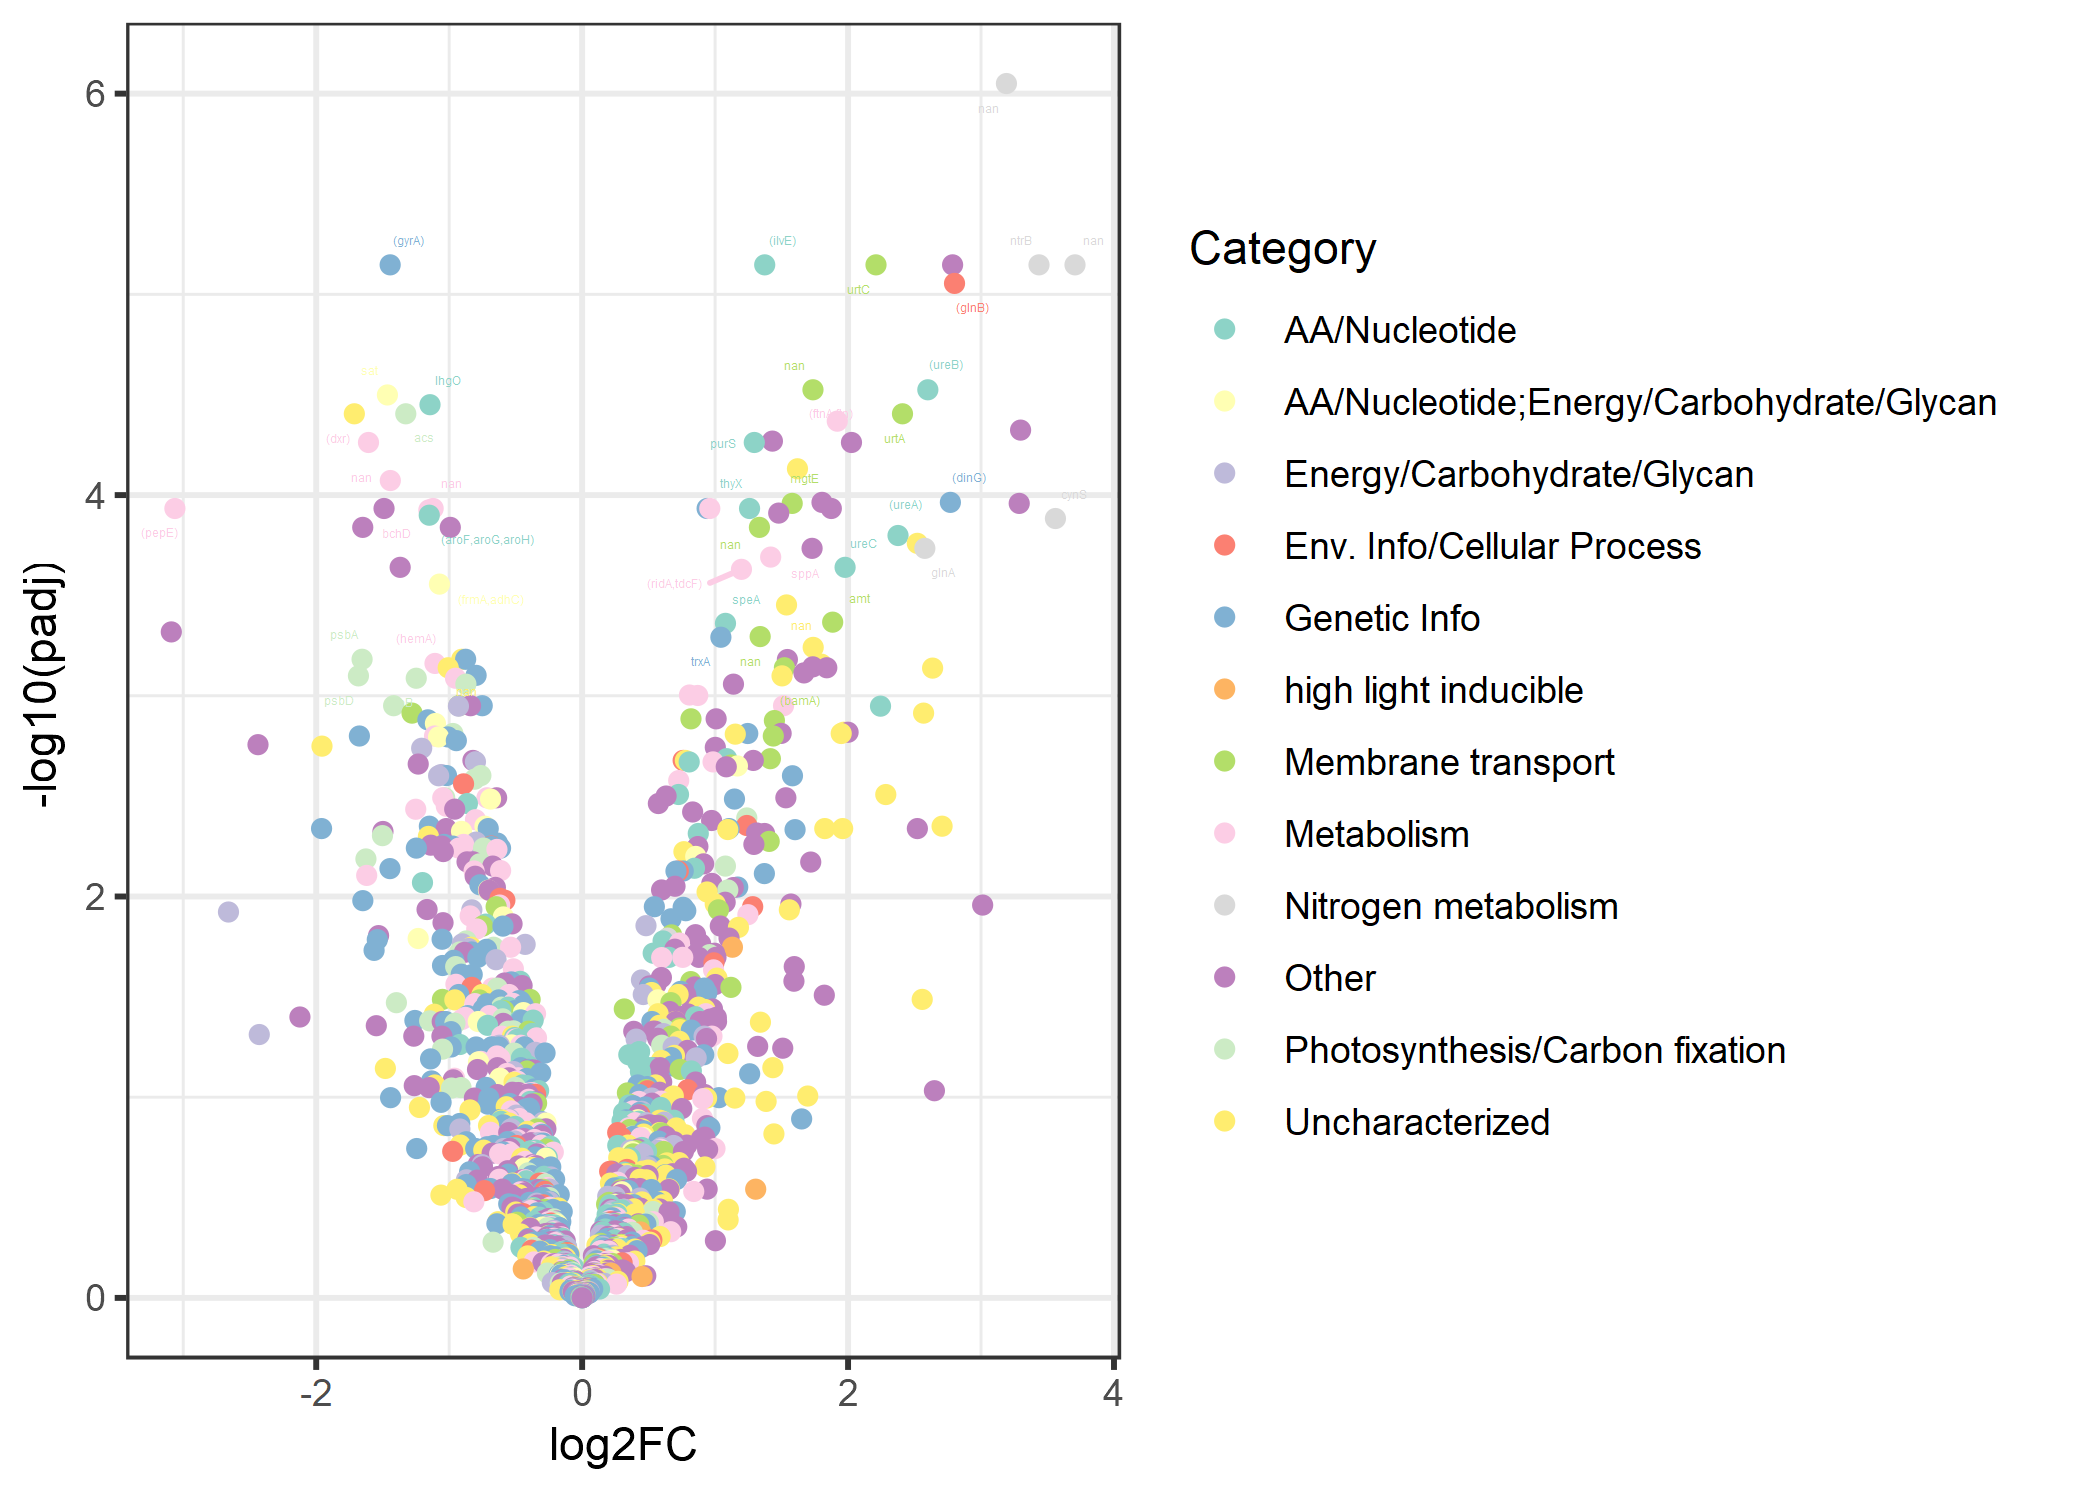

In [81]:
library(ggrepel)
assay = 'Proteome'
# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category, #shape=Category 
          )) + 
    geom_point(size=1.5 )+
    #theme_bw(base_size = 10) + # change theme
    theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    #geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    geom_text_repel(data=subset(df_all, (Assay==assay)&abs(logFC)>1&log.padj > 3),
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=1)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


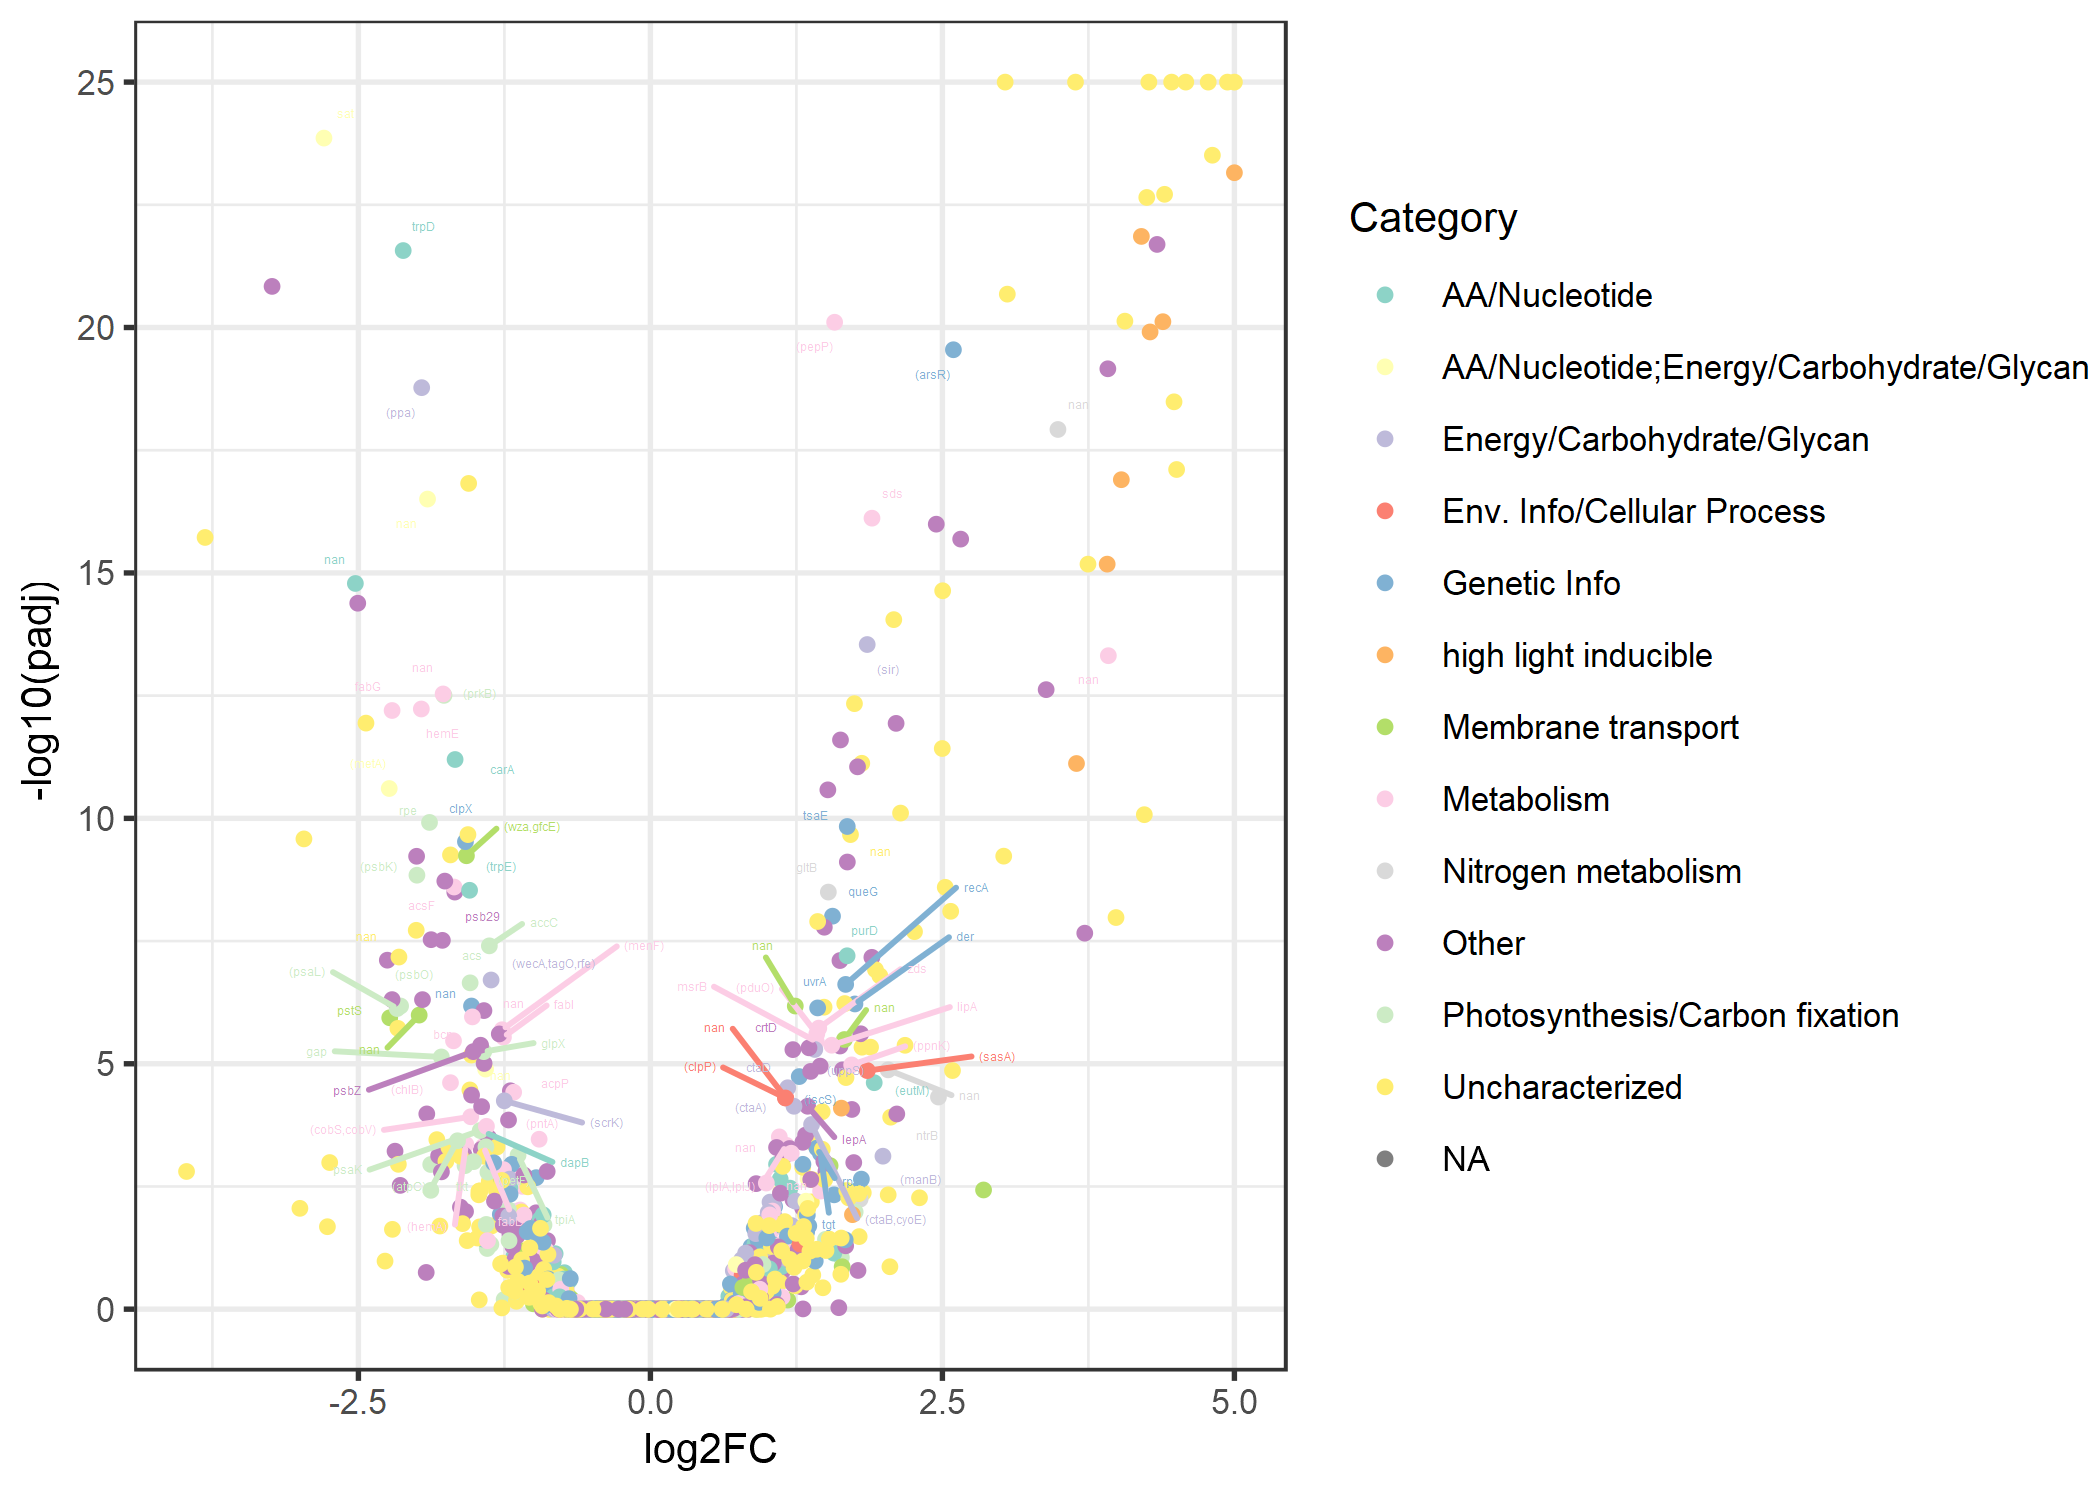

In [80]:
library(ggrepel)
assay = 'RNA'
# Use ggplot2 allows more flexibility in plotting
ymax <- 25
df_all$capped.log.padj <- pmin(df_all$log.padj, ymax)
xmax <- 5
df_all$capped.logFC <- pmin(df_all$logFC, xmax)

df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = capped.logFC, y =capped.log.padj, color=Category )) + 
    geom_point(size=1 )+
    theme_bw(base_size = 10) + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = c(-1,1), colour = "red") + # Add fold change cutoffs
    #geom_hline(yintercept = 3, colour = "red") + # Add significance cutoffs
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    geom_text_repel(data=subset(df_all, (Assay==assay)&abs(logFC)>1&log.padj > 3),
                    aes( capped.logFC, capped.log.padj ,label=gene), max.overlaps = Inf, size=1)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [143]:
df_all$kegg_gene

[1] "nrtC, nasD"                    "gyrA"                         
   [3] "E2.6.1.42, ilvE"               "nrtA, nasF, cynA"             
   [5] "urtC"                          NA                             
   [7] "nrtB, nasE, cynB"              "glnB"                         
   [9] "ABC.PE.S"                      "ureB"                         
  [11] "sat, met3"                     "lhgO"                         
  [13] NA                              "ACSS1_2, acs"                 
  [15] "urtA"                          "ftnA, ftn"                    
  [17] NA                              NA                             
  [19] NA                              "purS"                         
  [21] "dxr"                           NA                             
  [23] "K14330"                        NA                             
  [25] "dinG"                          "mgtE"                         
  [27] NA                              "pepE"                         
  [29] "hupB"                          NA                             
  [31] "thyX, thy1"                    NA                             
  [33] "acoB"                          "pncC"                         
  [35] "chlD, bchD"                    NA                             
  [37] "E2.5.1.54, aroF, aroG, aroH"   "cynS"                         
  [39] NA                              "TC.CIC"                       
  [41] NA                              "ureA"                         
  [43] NA                              NA                             
  [45] "glnA, GLUL"                    "sppA"                         
  [47] "ureC"                          NA                             
  [49] "ridA, tdcF, RIDA"              "frmA, ADH5, adhC"             
  [51] NA                              "amt, AMT, MEP"                
  [53] "speA"                          NA                             
  [55] "urtB"                          "trxA"                         
  [57] "K09958"                        NA                             
  [59] "psbA"                          "prfA, MTRF1, MRF1"            
  [61] NA                              "hemA"                         
  [63] NA                              NA                             
  [65] "SAM50, TOB55, bamA"            "K06873"                       
  [67] NA                              NA                             
  [69] NA                              "rpoS"                         
  [71] "psbD"                          NA                             
  [73] "nodU"                          "psbB"                         
  [75] "E2.2.1.1, tktA, tktB"          NA                             
  [77] "E3.4.21.102, prc, ctpA"        "pepP"                         
  [79] "rimP"                          "TC.SULP"                      
  [81] NA                              "ribH, RIB4"                   
  [83] "psbC"                          "eutM"                         
  [85] "K16149"                        "TC.SULP"                      
  [87] NA                              "ecfA1"                        
  [89] NA                              "dnaE"                         
  [91] "urtD"                          "metB"                         
  [93] NA                              NA                             
  [95] NA                              "psaA"                         
  [97] NA                              "ureG"                         
  [99] NA                              "RP-S5, MRPS5, rpsE"           
 [101] "lcyB, crtL1, crtY"             "murJ, mviN"                   
 [103] "tig"                           "AGXT"                         
 [105] "uvrB"                          NA                             
 [107] NA                              NA                             
 [109] "cysH"                          "eutN"                         
 [111] "urtE"                          "PRDX2_4, ahpC"                
 [113] NA                  

In [14]:
help(left_join)

mutate-joins {dplyr},R Documentation
"x, y","A pair of data frames, data frame extensions (e.g. a tibble), or lazy data frames (e.g. from dbplyr or dtplyr). See Methods, below, for more details."
by,"A join specification created with join_by(), or a character vector of variables to join by. If NULL, the default, ⁠*_join()⁠ will perform a natural join, using all variables in common across x and y. A message lists the variables so that you can check they're correct; suppress the message by supplying by explicitly. To join on different variables between x and y, use a join_by() specification. For example, join_by(a == b) will match x$a to y$b. To join by multiple variables, use a join_by() specification with multiple expressions. For example, join_by(a == b, c == d) will match x$a to y$b and x$c to y$d. If the column names are the same between x and y, you can shorten this by listing only the variable names, like join_by(a, c). join_by() can also be used to perform inequality, rolling, and overlap joins. See the documentation at ?join_by for details on these types of joins. For simple equality joins, you can alternatively specify a character vector of variable names to join by. For example, by = c(""a"", ""b"") joins x$a to y$a and x$b to y$b. If variable names differ between x and y, use a named character vector like by = c(""x_a"" = ""y_a"", ""x_b"" = ""y_b""). To perform a cross-join, generating all combinations of x and y, see cross_join()."
copy,"If x and y are not from the same data source, and copy is TRUE, then y will be copied into the same src as x. This allows you to join tables across srcs, but it is a potentially expensive operation so you must opt into it."
suffix,"If there are non-joined duplicate variables in x and y, these suffixes will be added to the output to disambiguate them. Should be a character vector of length 2."
...,Other parameters passed onto methods.
keep,"Should the join keys from both x and y be preserved in the output? If NULL, the default, joins on equality retain only the keys from x, while joins on inequality retain the keys from both inputs. If TRUE, all keys from both inputs are retained. If FALSE, only keys from x are retained. For right and full joins, the data in key columns corresponding to rows that only exist in y are merged into the key columns from x. Can't be used when joining on inequality conditions."
na_matches,"Should two NA or two NaN values match? ""na"", the default, treats two NA or two NaN values as equal, like %in%, match(), and merge(). ""never"" treats two NA or two NaN values as different, and will never match them together or to any other values. This is similar to joins for database sources and to base::merge(incomparables = NA)."
multiple,"Handling of rows in x with multiple matches in y. For each row of x: ""all"" returns every match detected in y. This is the same behavior as SQL. ""any"" returns one match detected in y, with no guarantees on which match will be returned. It is often faster than ""first"" and ""last"" if you just need to detect if there is at least one match. ""first"" returns the first match detected in y. ""last"" returns the last match detected in y. ""warning"" throws a warning if multiple matches are detected, and then falls back to ""all"". ""error"" throws an error if multiple matches are detected. The default value of NULL is equivalent to ""warning"" for equality joins and rolling joins, where multiple matches are usually surprising. If any inequality join conditions are present, then it is equivalent to ""all"", since multiple matches are usually expected."
unmatched,"How should unmatched keys that would result in dropped rows be handled? ""drop"" drops unmatched keys from the result. ""error"" throws an error if unmatched keys are detected. unmatched is intended to protect you from accidentally dropping rows during a join. It only checks for unmatched keys in the input that could potentially drop rows. For left joins, it checks y. For ri